# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**Saurabh Vijaykumar Gaikwad

# **Project Summary -**

Project activities have been categorised as under:

Defining the problem statement i.e. Business Objective of the study.
Collection and preparation of data by data cleaning , treating outliers etc.
Perform exploratory data analysis through a deep study of relationship between different features, generate new variables based on need inline with related business objectives. Present the data in easily understandable form.
Provide observations as well as recommendations based on model.prepare the model train it and with the help of various algorithm.Build our model to be capable of predict right predictions based on it's training.

# **GitHub Link -**

https://github.com/saurabhgv/Seoul_Bike_Sharing_Demand_prediction

# **Problem Statement**


The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information
Now a Days Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Alma Better/Module 1/EDA PROJECT/SeoulBikeData.csv',encoding='Unicode_escape')

In [ ]:
#copy dataset
df=dataset.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Duplicated data',len(df[df.duplicated()]))

Duplicated data 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Null values:',df.isnull().sum())

Null values: Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### What did you know about your dataset?

There are 14 column and 8760 rows in dataset.Ther is no null value present in entire dataset as well as duplicat values also not present.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#dataset describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

 The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

# Write your code to make your dataset analysis ready.
# Here funcation day seems to be removiable
df.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

<ipython-input-12-7a677331dc29>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()


Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

### What all manipulations have you done and insights you found?

Here as we can see Function day Has no affect on Rented Bike Count so ve firstly drop No columns and after that the Functioning day column

In [ ]:
# Drop rows which contain Functioning Day=No value
df=df.drop(df[df['Functioning Day']=='No'].index)

In [ ]:
#so now we have all Functioning Day=Yes so there is no meaning of hold it so drop it
df.drop('Functioning Day',axis=1,inplace=True)

In [ ]:
# shape of dataset
df.shape

(8465, 13)

In [ ]:
#convertind Date column from object to Datetime type
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-16-50c7767acc4b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [ ]:
# split into day month and year
df['day_of_week']=df['Date'].dt.day_name()
df['month']=df.Date.dt.month_name()
df['year']=df.Date.map(lambda x:x.year).astype('object')

In [ ]:
# drop Date column
df.drop('Date',inplace=True,axis=1)

In [ ]:
# In our dataset Hour column dtype is object but it will be treated as object so convert it into object type
df['Hour']=df['Hour'].astype('object')

In [ ]:
#Now spliting data into Numerical and categorical type
categorical_type=df.select_dtypes(include='object')
numerical_type=df.select_dtypes(exclude='object')

In [ ]:
# Categorical Data view
categorical_type.head()

Hour Seasons     Holiday day_of_week    month  year
0    0  Winter  No Holiday    Thursday  January  2017
1    1  Winter  No Holiday    Thursday  January  2017
2    2  Winter  No Holiday    Thursday  January  2017
3    3  Winter  No Holiday    Thursday  January  2017
4    4  Winter  No Holiday    Thursday  January  2017

In [ ]:
# numerical data view
numerical_type.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

<ipython-input-23-563cbf9b94e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-23-563cbf9b94e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-23-563cbf9b94e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in s

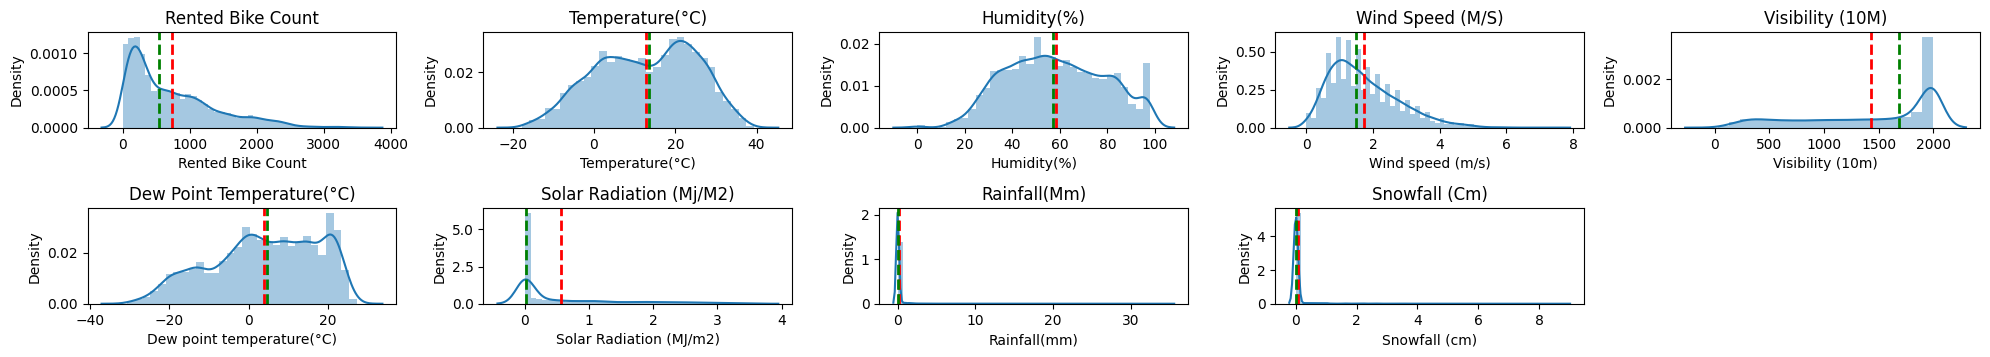

In [ ]:
# analizing data distribution
fig=plt.figure(figsize=(20,5))
for index,column in enumerate(numerical_type):
  plt.subplot(3,5,index+1)
  sns.distplot(df[column])
  feature=df[column]
  ax=fig.gca()
  ax.axvline(feature.mean(),color='red',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='green',linestyle='dashed',linewidth=2)
  plt.title(f'{column.title()}')
  plt.tight_layout()
  

##### 1. Why did you pick the specific chart?

From thid chart we can easily understand the squeness of out variabels.

##### 2. What is/are the insight(s) found from the chart?

As we ploted two axvlines inthe the chart these lines will show us the mean and median of the variabels.

## Chart - 2

# pair plot

Text(0.5, 1.0, 'Pairplot that display the relation of variable with other variable')

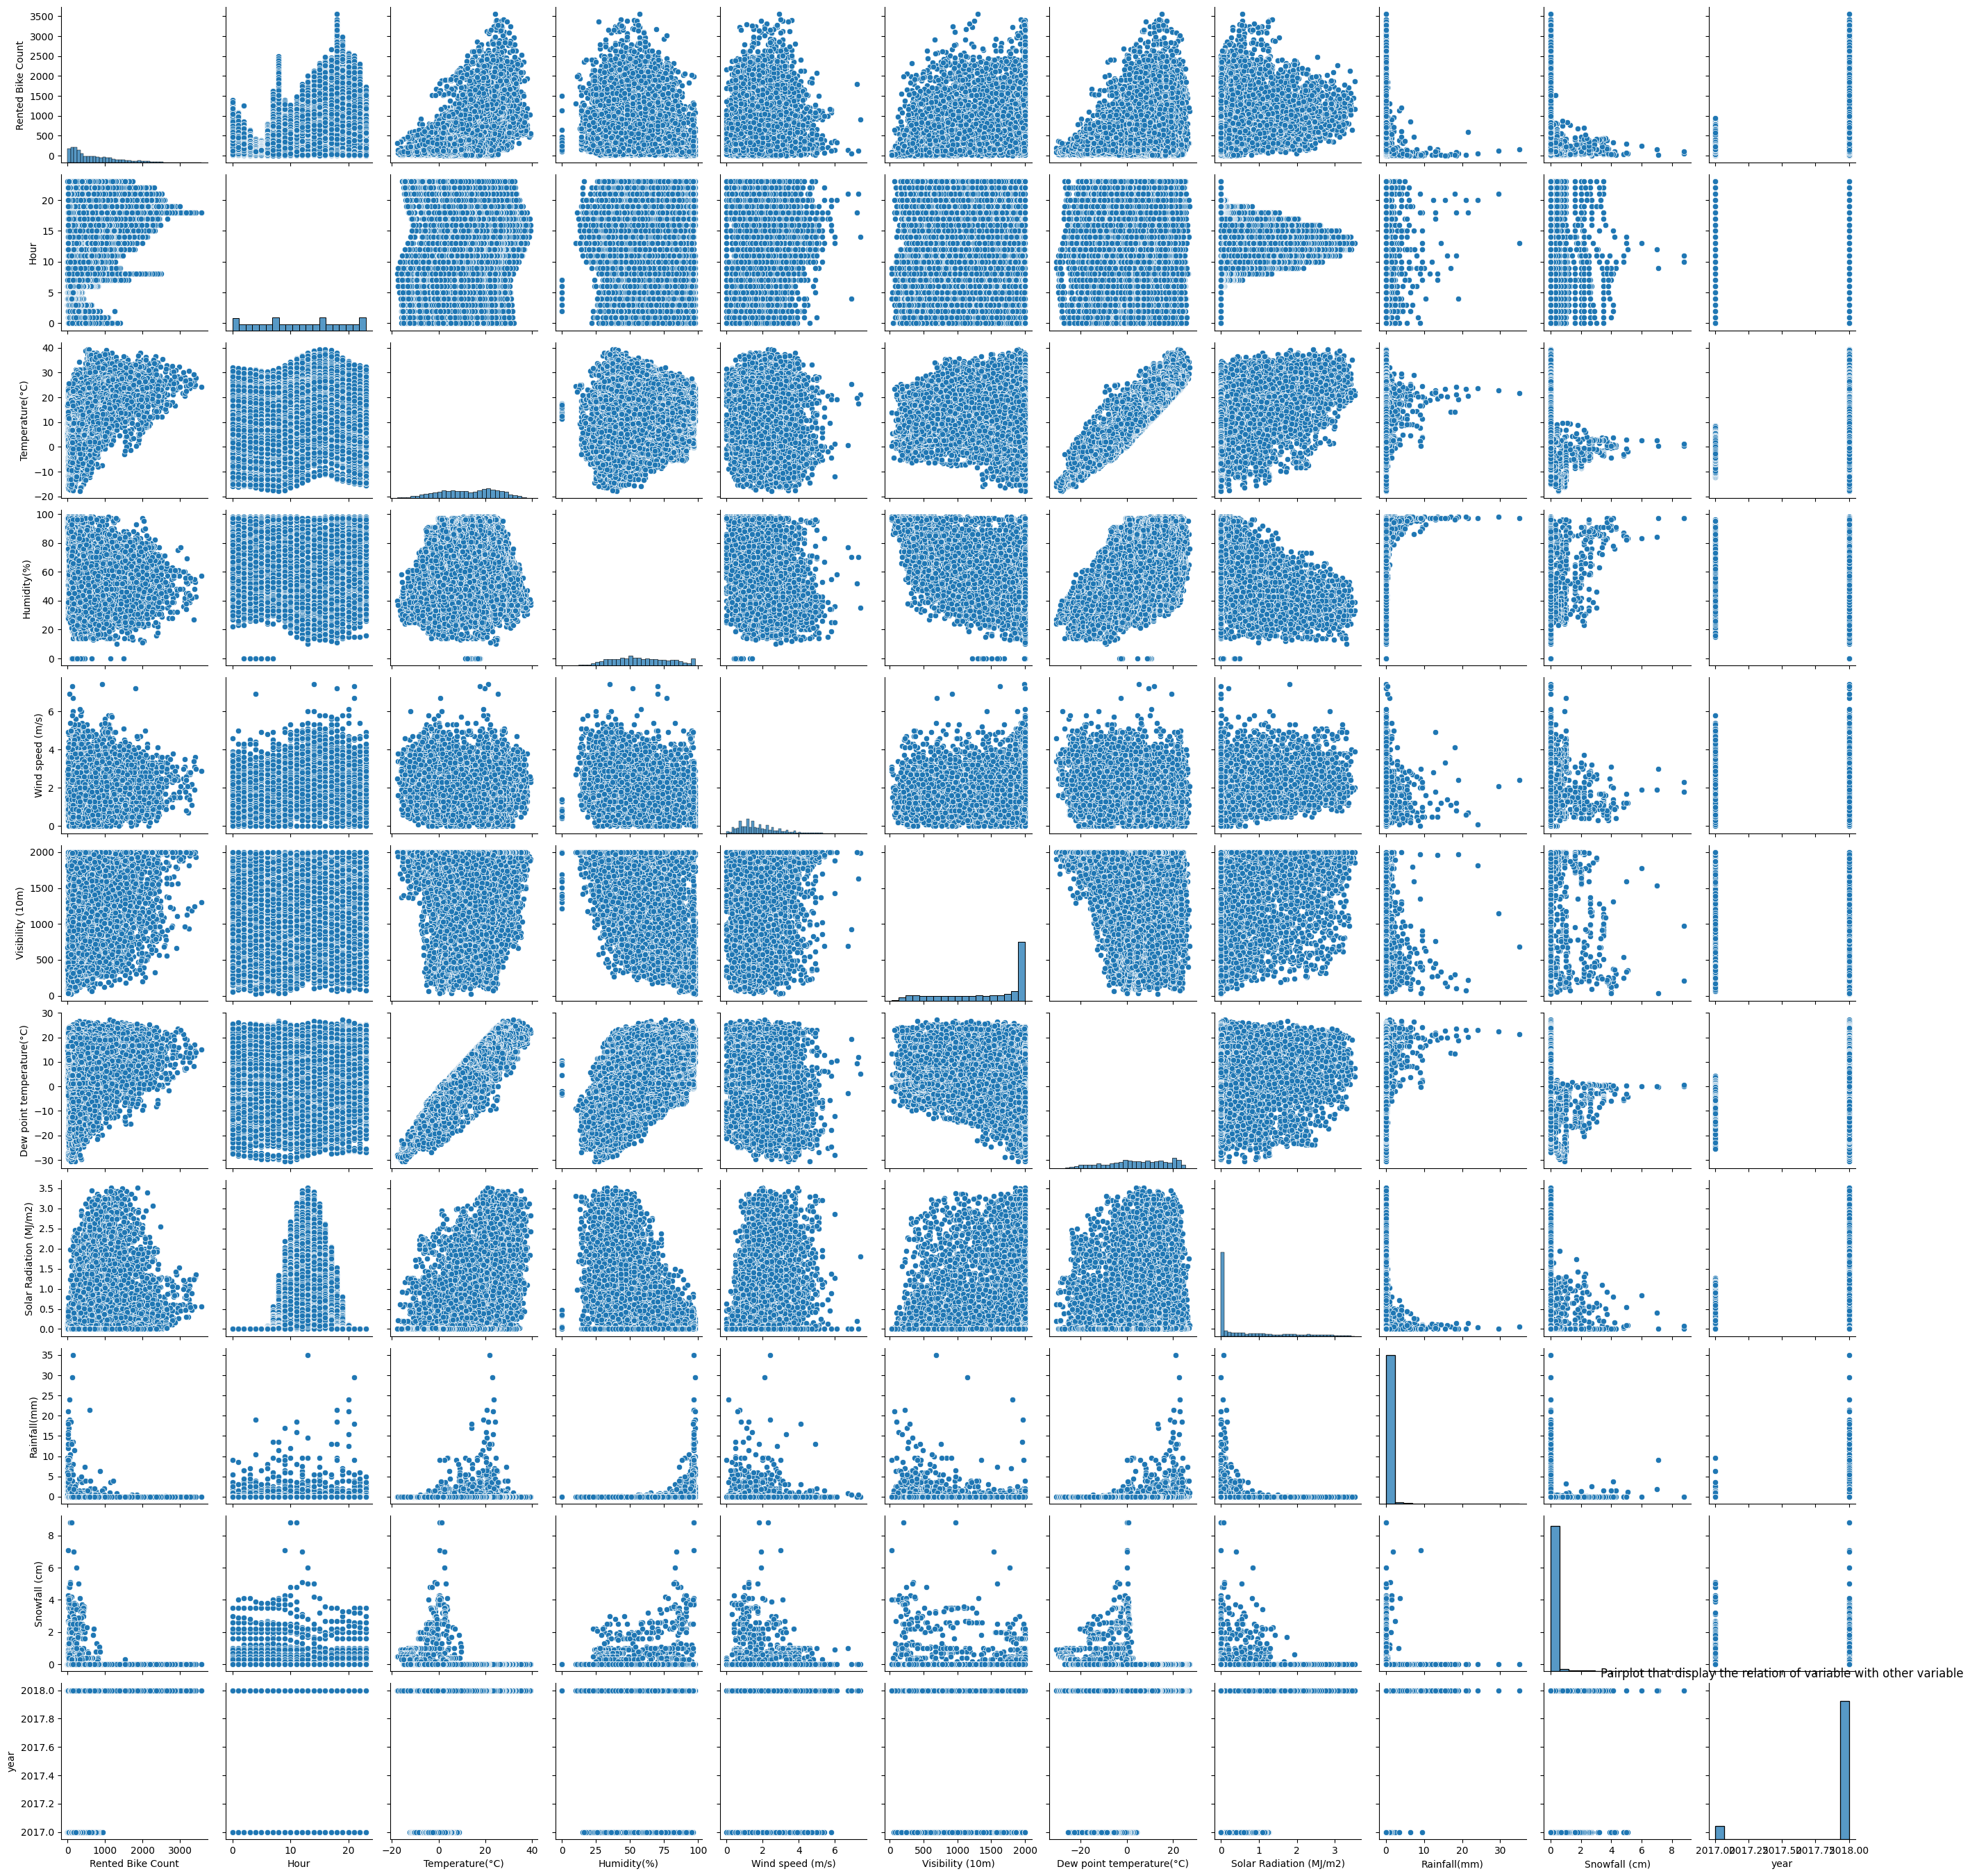

In [ ]:
# This chart display us the corelation
sns.pairplot(df)
plt.title('Pairplot that display the relation of variable with other variable')

##### 1. Why did you pick the specific chart?

The pairplot is the chart which will show us the every datapoint location so it will vary good chart for observation of relations.

## Chart - 3

# correlation Heatmap

<ipython-input-25-ed63159e4c38>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


Text(0.5, 1.0, 'Heat map to display correlation between variabels')

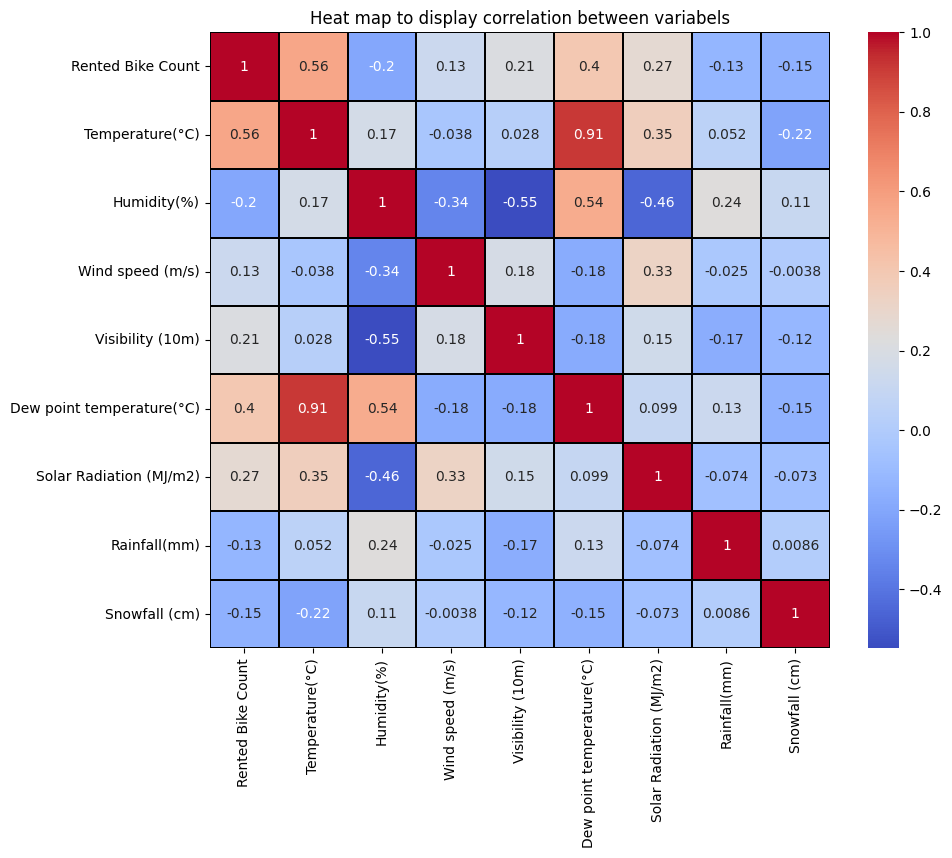

In [ ]:
# Also we will get correlation between variabels with the help of heatmap
plt.figure(figsize=(10,8))
df_corr=df.corr()
sns.heatmap(df_corr,cmap='coolwarm',annot=True,linewidth=0.1,linecolor='black')
plt.title('Heat map to display correlation between variabels')

##### 1. Why did you pick the specific chart?

This will clearly display the correlations between the varibles.

##### 2. What is/are the insight(s) found from the chart?

As we can see in above two graphs the correlation of Temperatur with dew point temperature is very high we have to drop or merge the two columns to avoid multicolinarity.

## Chart - 4

In [ ]:
#converting day to week_day and weekend
df['week']=df['day_of_week'].apply(lambda x:'weekend' if x=='Saturday' or x=='Sunday' else 'weekday')

In [ ]:
df.week.value_counts()

weekday    6024
weekend    2441
Name: week, dtype: int64

In [ ]:
df.drop('day_of_week',axis=1,inplace=True)

Text(0.5, 1.0, 'Rented bike count depeand on week type')

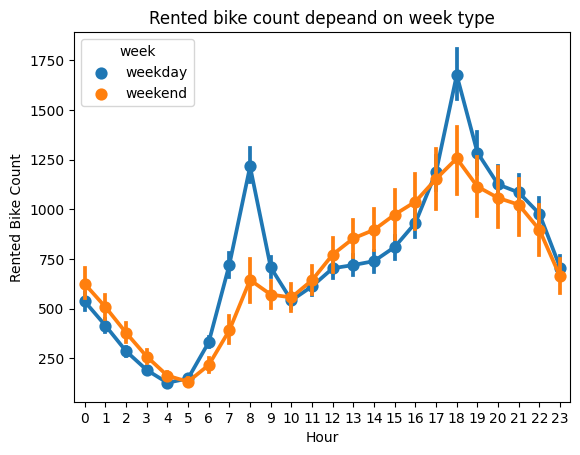

In [ ]:
sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df['week'])
plt.title('Rented bike count depeand on week type')

##### 1. Why did you pick the specific chart?

The given point plot display us up and down of different data using point.

## Chart - 5

In [ ]:
df_seasons=df.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()

In [ ]:
df_seasons

Temperature(°C)  Rented Bike Count
0              -17.8                322
1              -17.5                291
2              -17.4                 64
3              -16.9                 36
4              -16.5                 96
..               ...                ...
541             38.0               1184
542             38.7                475
543             39.0               1033
544             39.3                531
545             39.4                561

[546 rows x 2 columns]

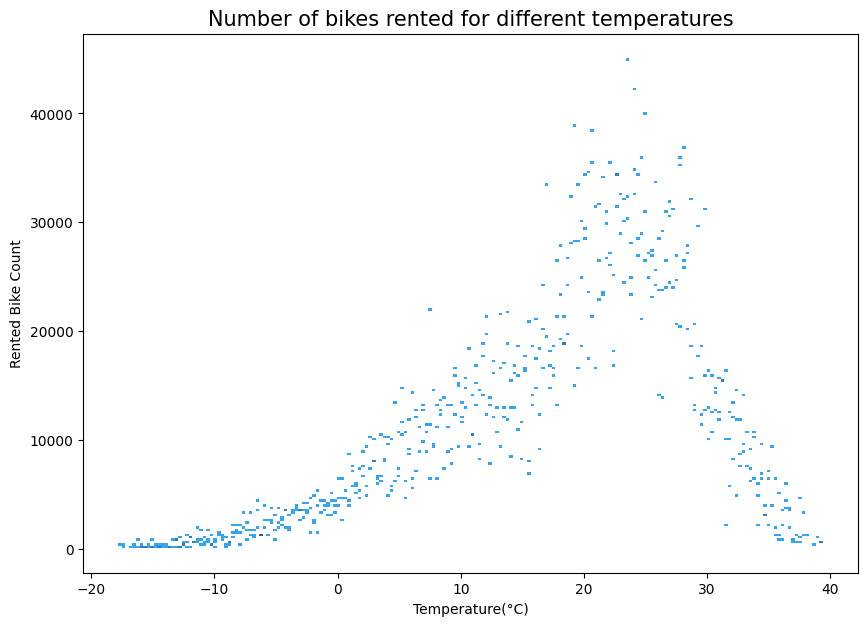

In [ ]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=df_seasons,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

##### 1. Why did you pick the specific chart?

By using Histplot we hav ploted temperature effect on Rented Bike Count.and this graph display the all datapoints in the dataset and their movement

##### 2. What is/are the insight(s) found from the chart?

From this chart I understand that the Autumn Has higest number of Rented Bike Count However Winter Has Lowest.

## Chart - 6

Text(0.5, 1.0, 'Rented Bike count using catplot')

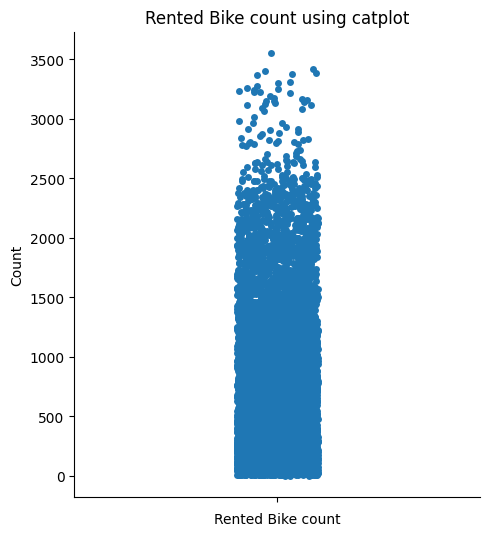

In [ ]:
#Rented Bike count using catplot
sns.catplot(df['Rented Bike Count'])
plt.xlabel('Rented Bike count')
plt.ylabel('Count')
plt.title('Rented Bike count using catplot')

Text(0.5, 1.0, 'Rented Bike count using violin plot')

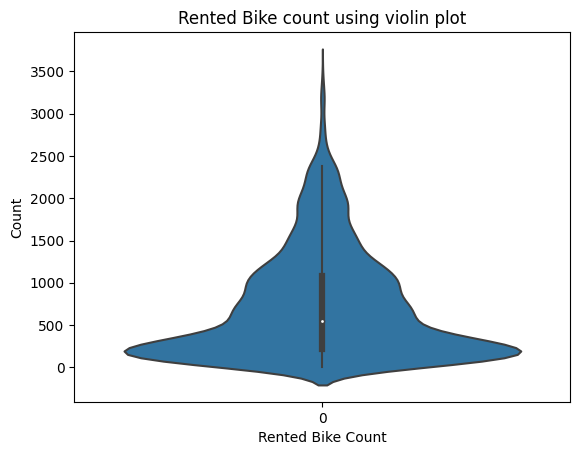

In [ ]:
#Rented Bike count using violin plot
sns.violinplot(df['Rented Bike Count'])
plt.xlabel('Rented Bike Count')
plt.ylabel('Count')
plt.title('Rented Bike count using violin plot')

##### 1. Why did you pick the specific chart?

These two graph or plot are visually understandable of anyone so it is easiest to know about the data by third peerson.

##### 2. What is/are the insight(s) found from the chart?

From Second Plot it is easy to understand Rented Bike Count demand is large in between 0 to 500.

## Chart - 7

# BOXPLOT

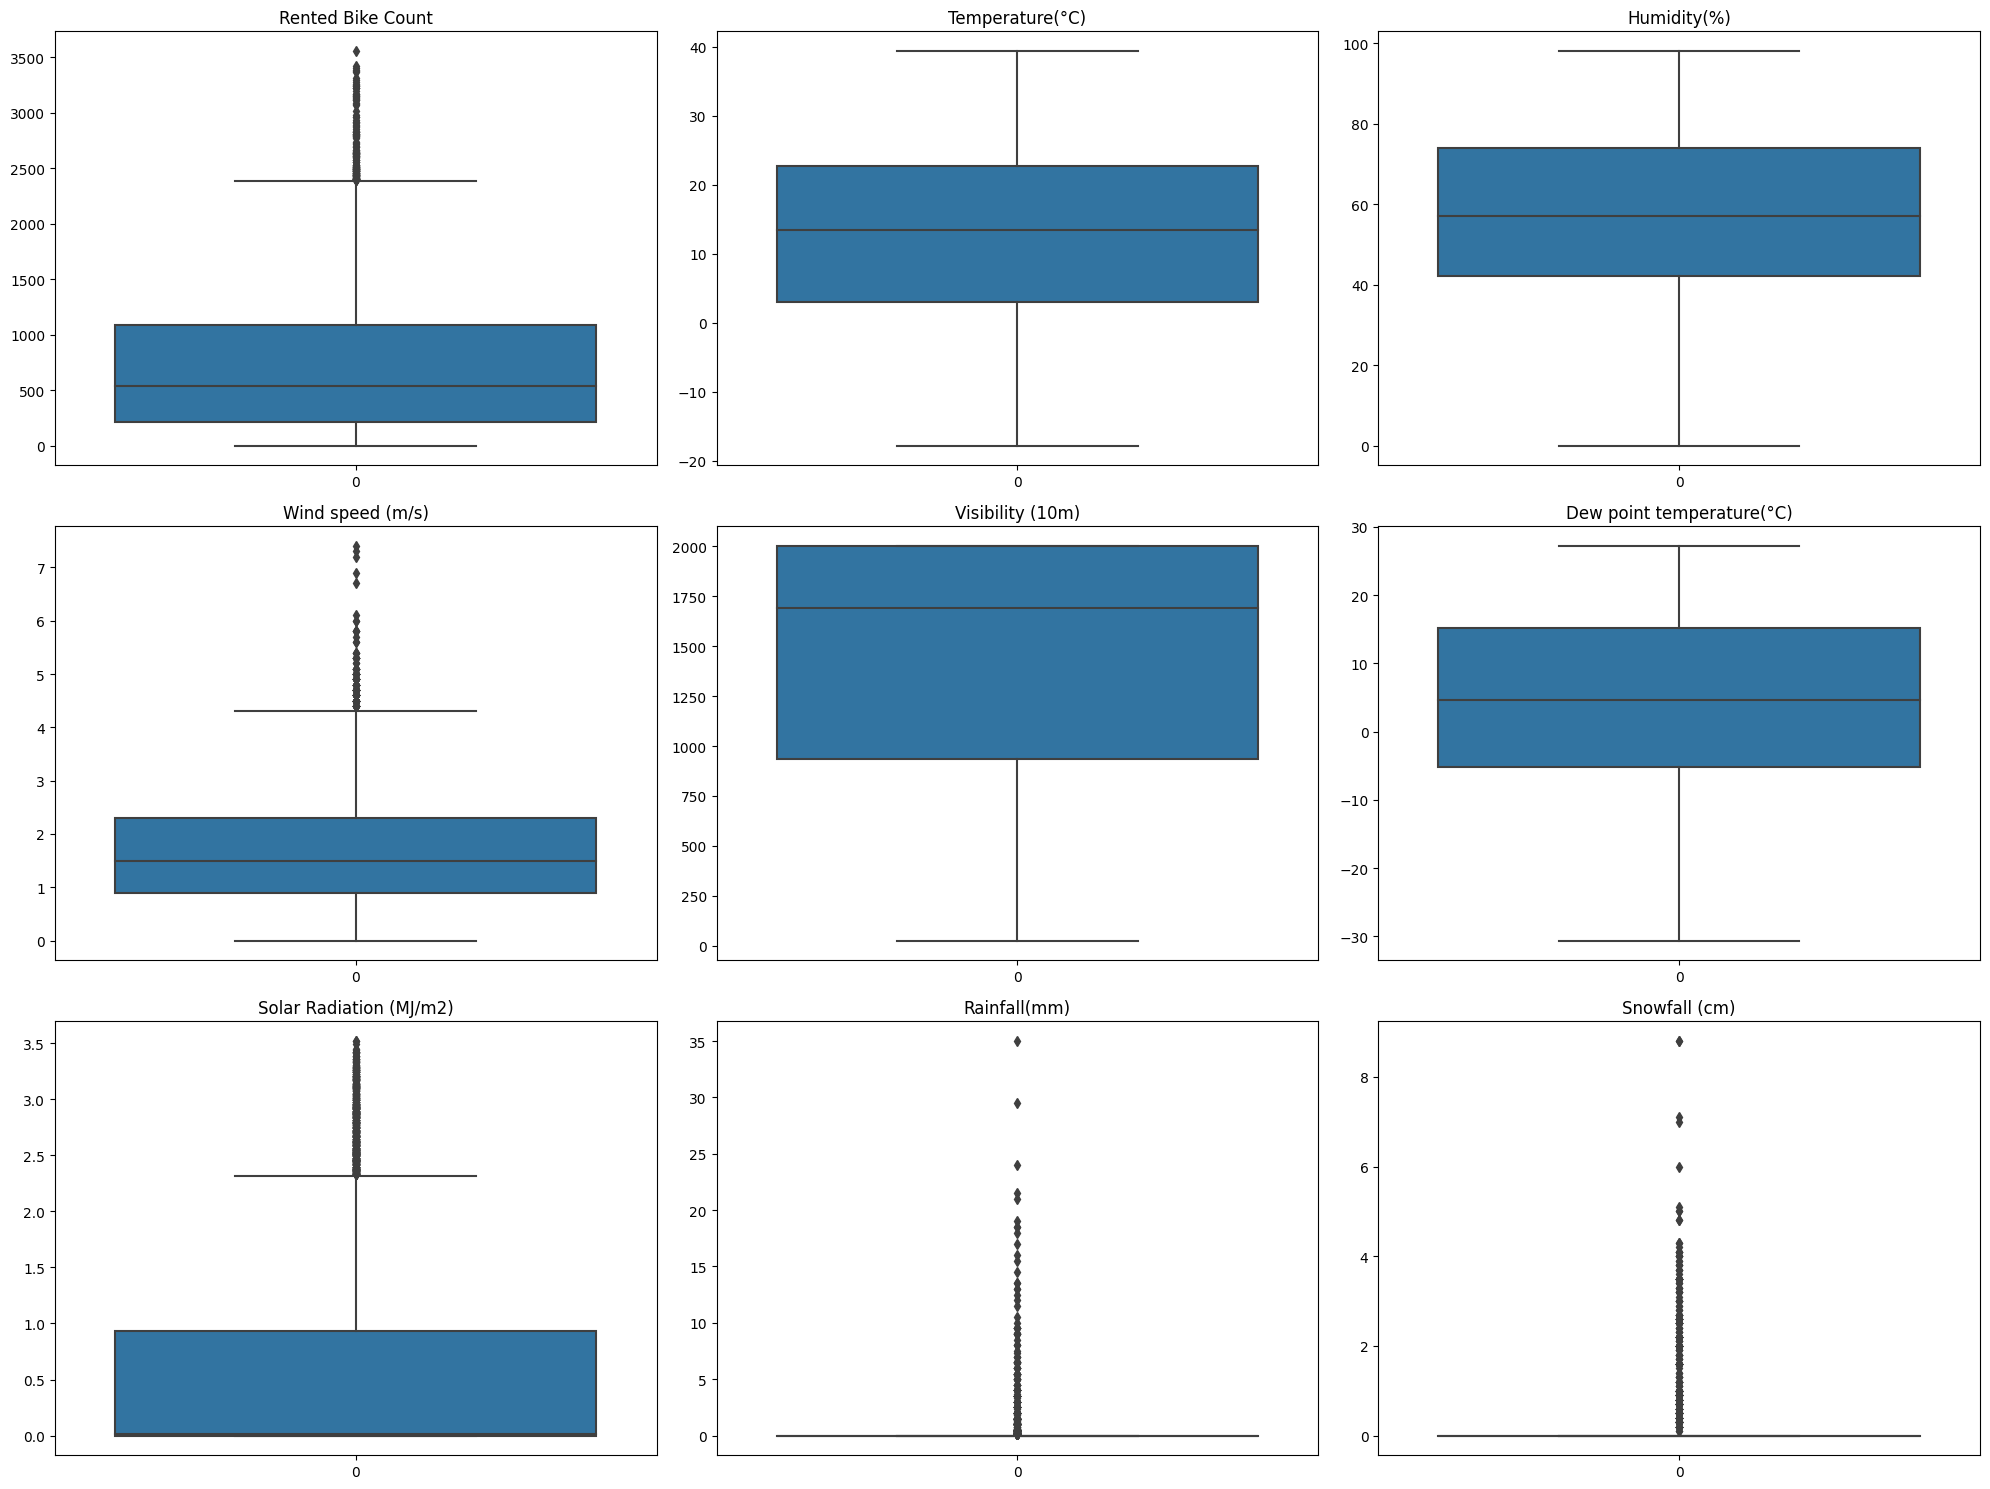

In [ ]:
#Chacking outliers by Boxplot
n=1
plt.figure(figsize=(20,15))
for i in numerical_type.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

This graph is very useful to display outliers and mean of our specific variables.

#### Chart - 8

<ipython-input-36-87af91e280d4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Rented Bike Count']),ax=axes[0],color='brown').set_title('Inputed df')
<ipython-input-36-87af91e280d4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['Rented Bike Count']+0.0000001),ax=axes[1],colo

Text(0.5, 1.0, 'Cube Root')

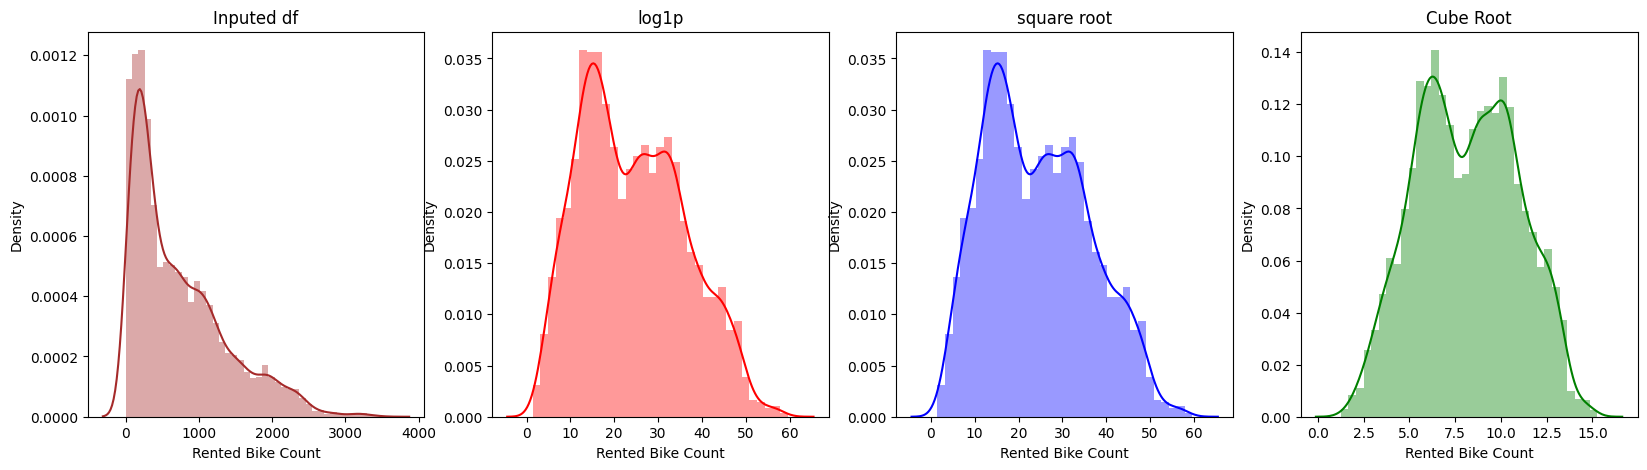

In [ ]:
# Transformation on Dependent Variable
# as earlear ve saw our dependent variable is right skewed so it need to normilize
fig,axes=plt.subplots(1,4,figsize=(20,5))
sns.distplot((df['Rented Bike Count']),ax=axes[0],color='brown').set_title('Inputed df')
sns.distplot(np.sqrt(df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title('log1p')
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2],color='blue').set_title('square root')
sns.distplot(np.cbrt(df['Rented Bike Count']),ax=axes[3],color='green').set_title('Cube Root')

##### 2. What is/are the insight(s) found from the chart?

Here we used log10,square root,Cube root transform although all graph seems same the Cube root transform is more accurate as compair to all other this is used to remove skewness of variable.

#### Chart - 9

Text(0.5, 1.0, 'Rental Bike Count during Hour with Respect to year')

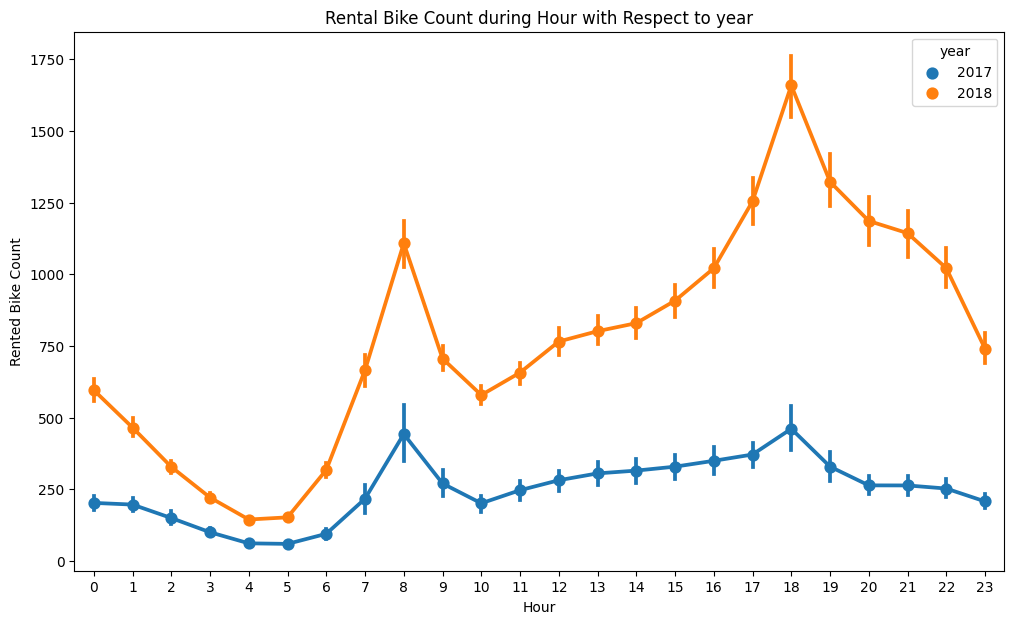

In [ ]:
#Rental Bike Count during Hour with Respect to year
plt.figure(figsize=(12,7))
sns.pointplot(x=df.Hour,y=df['Rented Bike Count'],hue=df.year)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rental Bike Count during Hour with Respect to year')

##### 1. Why did you pick the specific chart?

In the above graph the pointplot used to pointout year wise Rental Bike Count vary clearly.

##### 2. What is/are the insight(s) found from the chart?

point plot is a graph which gives an exact view of Data points so as we see in 2018 the count of Rnted Bike usage is more as compaired to 2017.

#### Chart - 10

Text(0.5, 1.0, ' Rented Bike count for Hour With respect to month')

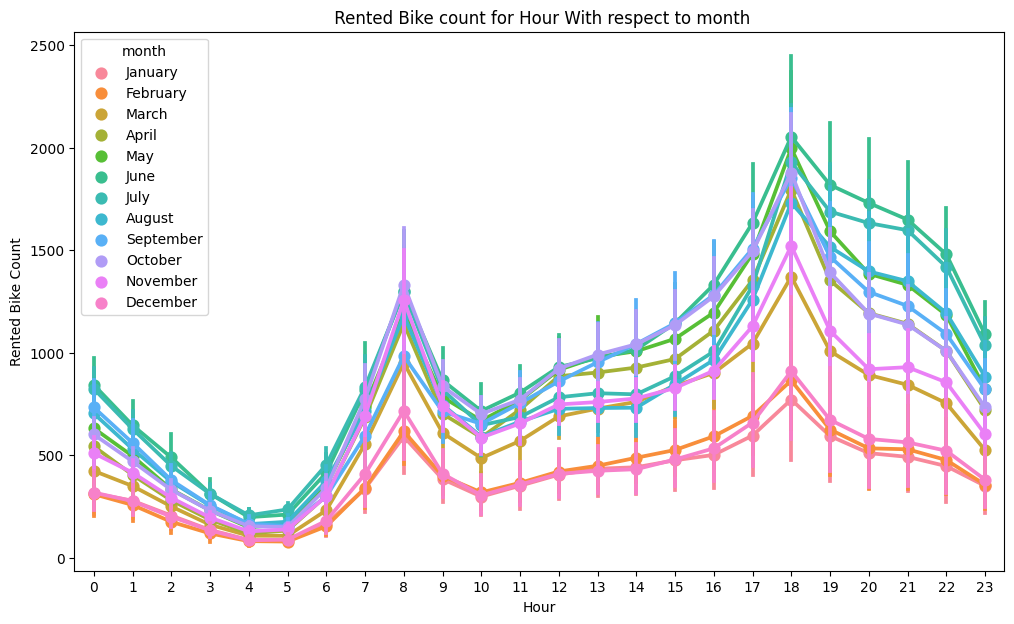

In [ ]:
# Rented Bike count for Hour With respect to month
plt.figure(figsize=(12,7))
sns.pointplot(x=df.Hour,y=df['Rented Bike Count'],hue=df.month)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title(' Rented Bike count for Hour With respect to month')

##### 1. Why did you pick the specific chart?

Because it is not hard to see so many variabels in same graph and it also gives us good information.

#### Chart - 11

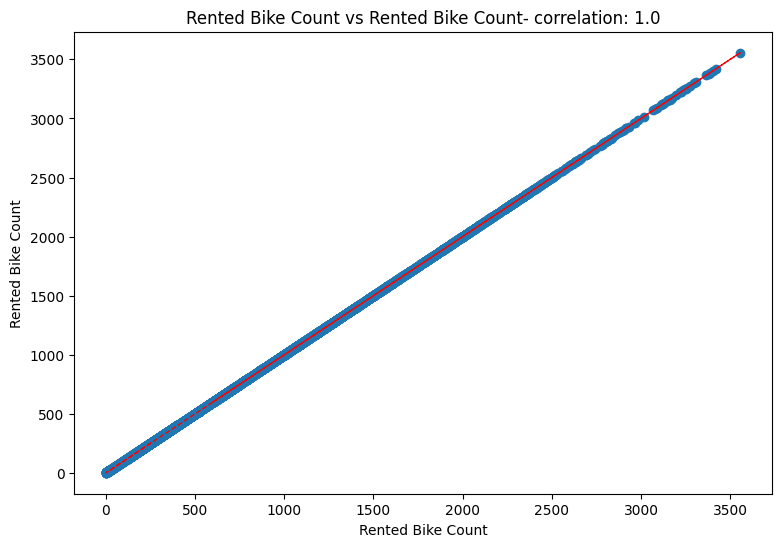

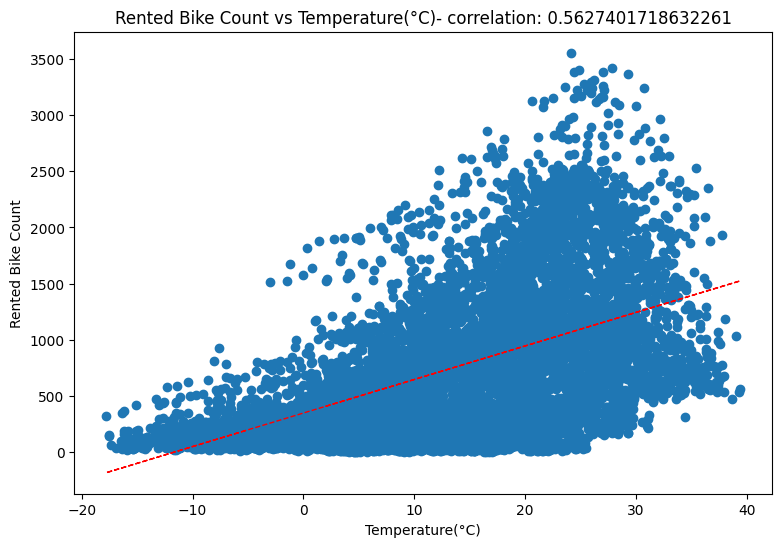

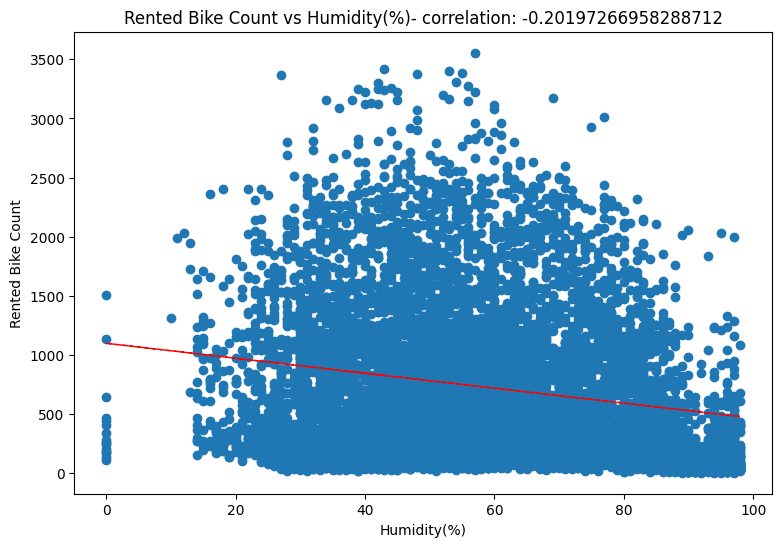

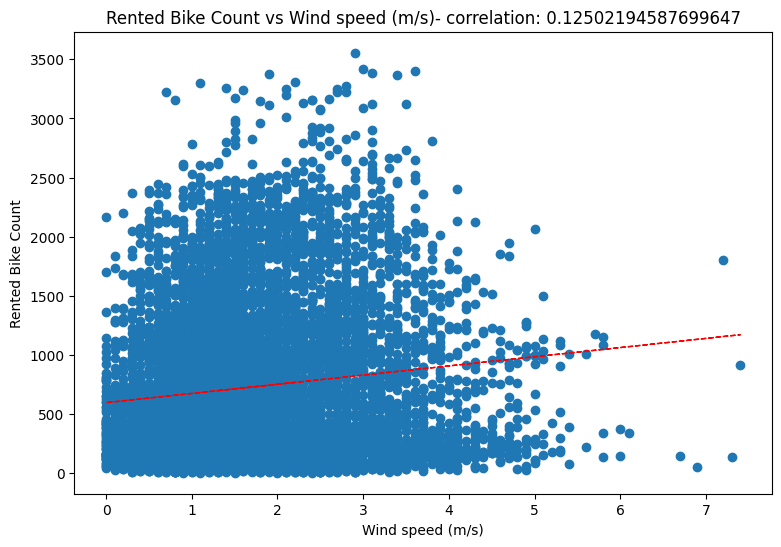

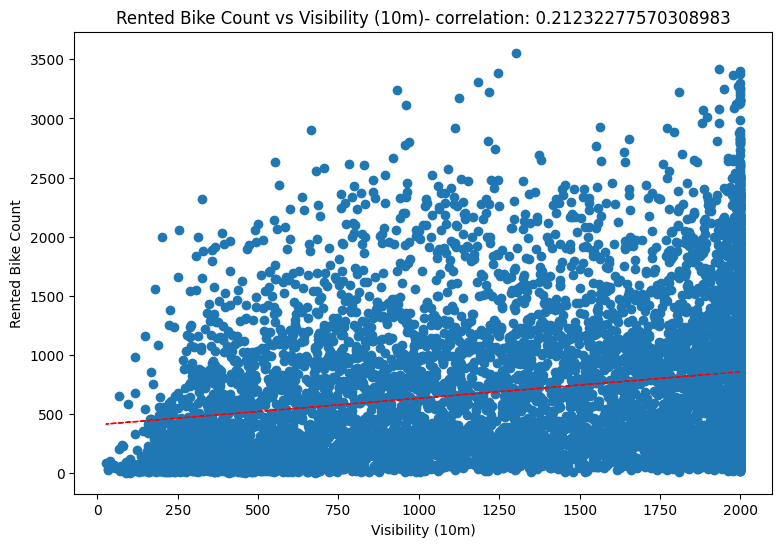

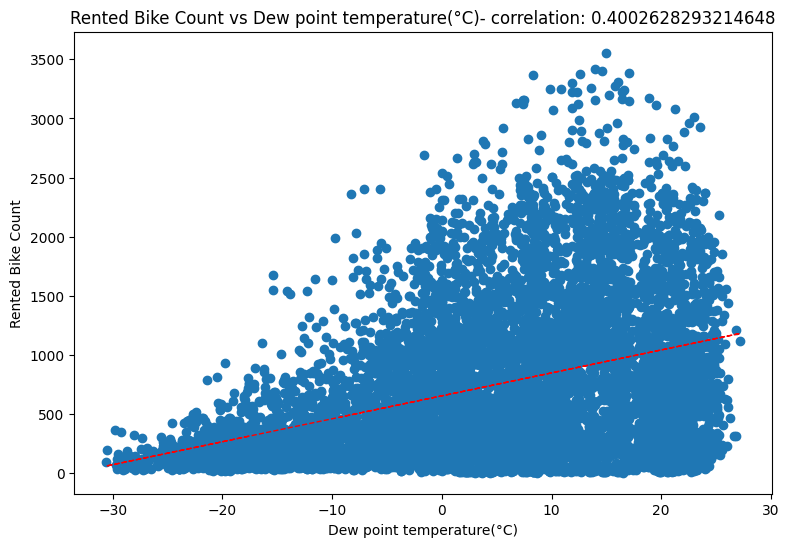

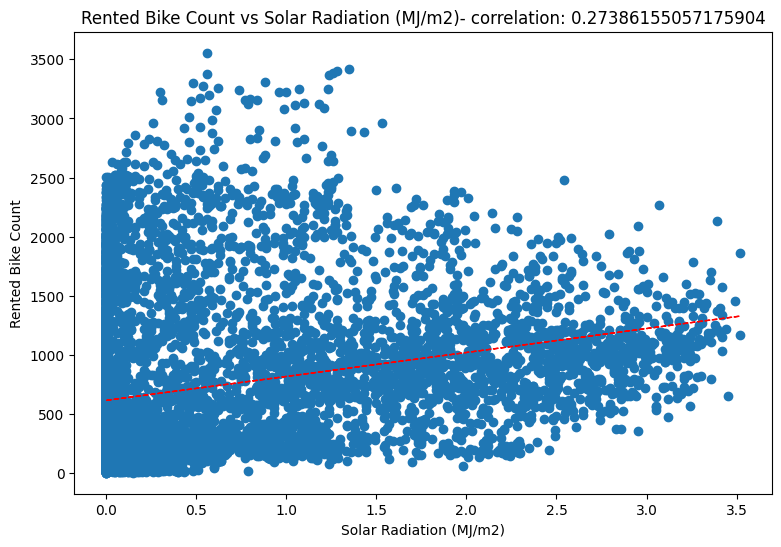

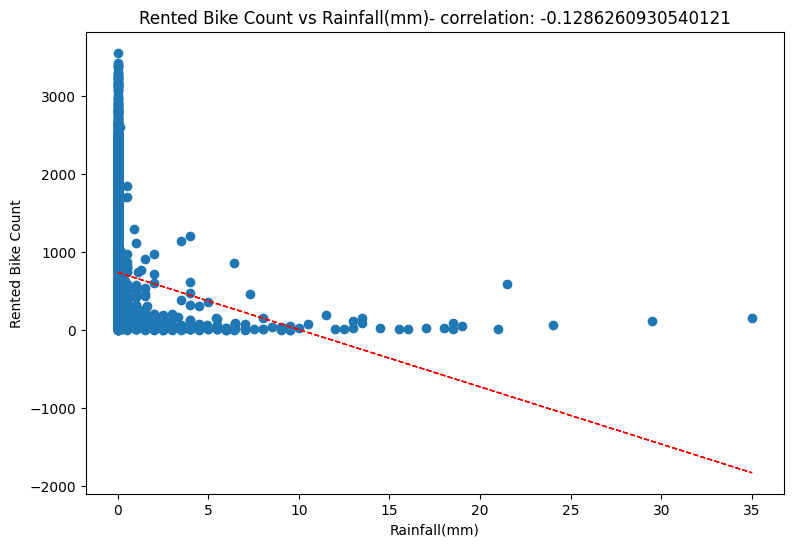

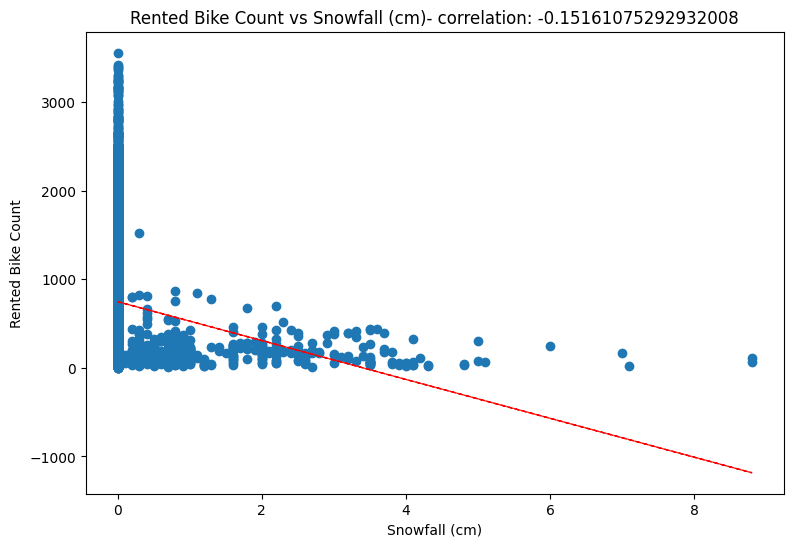

In [ ]:
# Regression plot to know relation betweeen all independent variable with dependent variable
for col in numerical_type[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

By using above graph and its various entities we can easily plot the line of best fit.

## Chart 12

In [ ]:
def create_df_analysis(col):
  return df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [ ]:
holidays_col = create_df_analysis('Holiday')
holidays_col


Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419

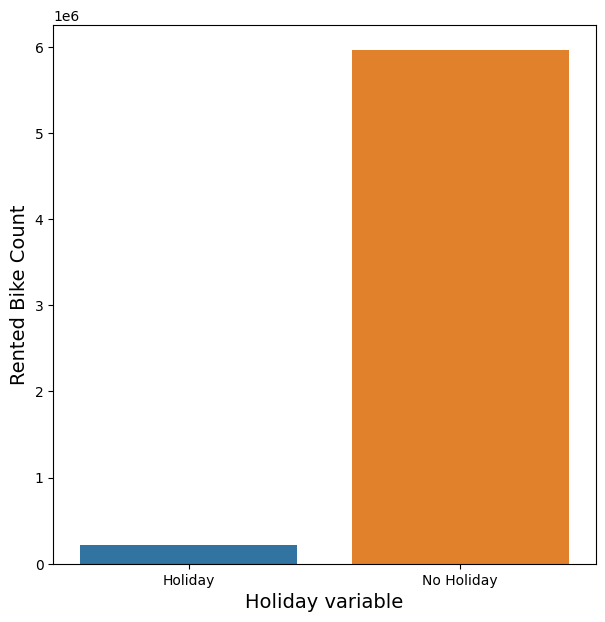

In [ ]:
# Barplot to display Rented Bike Count on holiday
plt.figure(figsize=(7,7))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented Bike Count')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

Here you can see on no holiday most number of Rented bike are used compaired to Holiday

## Chart 13

In [ ]:
humidity_bike = create_df_analysis('Humidity(%)')
humidity_bike

Humidity(%)  Rented Bike Count
0             0               6930
1            10               1315
2            11               1986
3            12               2032
4            13               4353
..          ...                ...
85           94              13669
86           95              12146
87           96              18962
88           97              28730
89           98               8616

[90 rows x 2 columns]

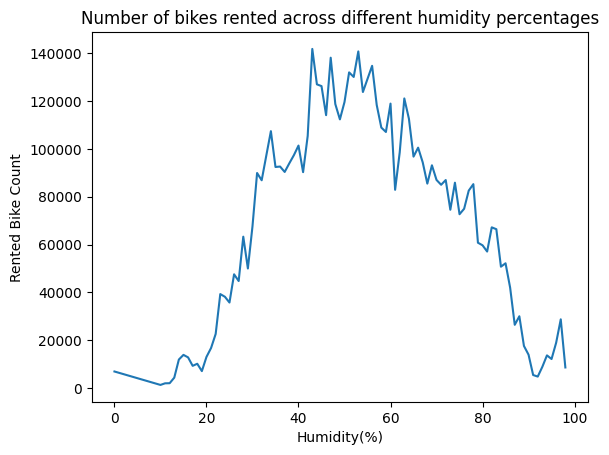

In [ ]:
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()

As we can see that the majority of the bikes are rented for a humidity percentage range of 30 to 70.

In [ ]:
Seasons_bike = create_df_analysis('Seasons')
Seasons_bike

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

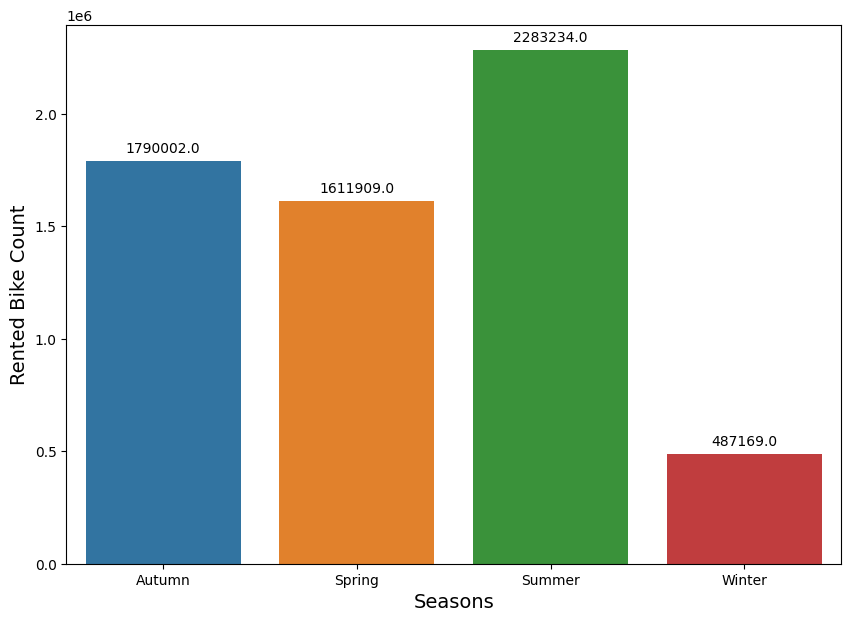

In [ ]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=Seasons_bike,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [ ]:
# drop column which are not useful
df.drop(columns={'month','year'},inplace=True,axis=1)

In [ ]:
df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday     week  
0           0.0            0.0  Winter  No Holiday  weekday  
1           0.0            0.0  Winter  No Holiday  weekday  
2           0.0            0.0  Winter  No Holiday  weekday  
3           0.0            0.0  Winter  No Holiday  weekday  
4           0.0            0.0  Winter  No Holiday  weekday

## **Feature Engineering**

In [ ]:
df=pd.get_dummies(df, columns=['Seasons', 'Holiday'], drop_first=True)


In [ ]:
df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)     week  Seasons_Spring  Seasons_Summer  \
0           0.0            0.0  weekday               0               0   
1           0.0            0.0  weekday               0               0   
2           0.0            0.0  weekday               0               0   
3           0.0            0.0  weekday               0               0   
4           0.0            0.0  weekday               0               0   

   Seasons_Winter  Holiday_No Holiday  
0               1                   1  
1               1                   1  
2               1                   1  
3               1                   1  
4               1                   1

###  Handling Outliers

As we can saw in chart number 7 in Boxplot there were loats of outliers so we have to remove the outliers to make out best.
So except Rental Bike Count in Rainfall(mm),Wind speed (m/s),Snowfall (cm),Solar Radiation (MJ/m2) contain outliers so we can treat them.

In [ ]:
# Handling Outliers & Outlier treatments
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [ ]:
#finding the inter-quartile range for the column with outliers
Q1=df[outlier_cols].quantile(0.25)
Q2=df[outlier_cols].quantile(0.75)
InterQR=Q2-Q1

In [ ]:
InterQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [ ]:
#calculating the upper and lower fence for outlier removal
upper_fence=Q2+(1.5*InterQR)
lower_fence=Q1-(1.5*InterQR)

In [ ]:
#Detecting and removing outliers
df[outlier_cols]=df[outlier_cols][~((df[outlier_cols]<lower_fence)|(df[outlier_cols]>upper_fence))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   object 
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8311 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    7845 non-null   float64
 8   Rainfall(mm)               7949 non-null   float64
 9   Snowfall (cm)              8022 non-null   float64
 10  week                       8465 non-null   object 
 11  Seasons_Spring             8465 non-null   uint8  
 12  Seasons_Summer             8465 non-null   uint8  
 13  Seasons_Winter             8465 non-null   uint8

In [ ]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [ ]:
impute_null(outlier_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   object 
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  week                       8465 non-null   object 
 11  Seasons_Spring             8465 non-null   uint8  
 12  Seasons_Summer             8465 non-null   uint8  
 13  Seasons_Winter             8465 non-null   uint8

In [ ]:
df=pd.get_dummies(df, columns=['week'], drop_first=True)

In [ ]:
df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons_Spring  Seasons_Summer  \
0           0.0            0.0               0               0   
1           0.0            0.0               0               0   
2           0.0            0.0               0               0   
3           0.0            0.0               0               0   
4           0.0            0.0               0               0   

   Seasons_Winter  Holiday_No Holiday  week_weekend  
0               1                   1             0  
1               1                   1             0  
2               1                   1             0  
3               1                   1             0  
4               1                   1             0

In [ ]:
df['Hour']=df.Hour.astype('int')

In [ ]:
df.Hour.dtype

dtype('int64')

## **Train Test Split of data**

In [ ]:
# split data in x and y variable
X=df.drop('Rented Bike Count',axis=1)
Y=df['Rented Bike Count']

In [ ]:
# train test split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:

# X_train data first look
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1542     6             -7.8           57               1.5              1867   
999     15             -8.3           42               3.8              1745   
2964    12             19.6           63               2.9              1034   
8758    22              2.1           41               1.0              1859   
6112    16             34.1           47               2.5              2000   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
1542                      -14.8                     0.00           0.0   
999                       -18.9                     0.93           0.0   
2964                       12.3                     0.68           0.0   
8758                       -9.8                     0.00           0.0   
6112                       21.1                     0.61           0.0   

      Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
1542            0.0               0               0               1   
999             0.0               0               0               1   
2964            0.0               1               0               0   
8758            0.0               0               0               0   
6112            0.0               0               1               0   

      Holiday_No Holiday  week_weekend  
1542                   1             0  
999                    1             0  
2964                   1             1  
8758                   1             0  
6112                   1             1

In [ ]:
# X_test first look
X_test.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
5028    12             27.0           68               2.0              1863   
5121     9             21.0           97               1.3               825   
4191    15             23.5           36               3.2              1786   
8498     2              2.6           46               1.5              1811   
8072     8              4.7           72               1.0              1306   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
5028                       20.5                     1.30           0.0   
5121                       20.4                     0.14           0.0   
4191                        7.5                     0.00           0.0   
8498                       -7.8                     0.00           0.0   
8072                        0.0                     0.12           0.0   

      Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
5028            0.0               0               1               0   
5121            0.0               0               1               0   
4191            0.0               1               0               0   
8498            0.0               0               0               0   
8072            0.0               0               0               0   

      Holiday_No Holiday  week_weekend  
5028                   1             0  
5121                   1             0  
4191                   1             0  
8498                   1             0  
8072                   1             1

In [ ]:
# Y_train firstlook
Y_train.head()

1542     33
999     181
2964    913
8758    712
6112    959
Name: Rented Bike Count, dtype: int64

In [ ]:
# Y_test first look
Y_test.head()

5028    1158
5121     128
4191    1174
8498     286
8072    1906
Name: Rented Bike Count, dtype: int64

In [ ]:
# display thee shape of train and test data
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,

((6772, 14), (1693, 14), (6772,), (1693,))

## **Evaluation metrics for regression**

In [ ]:
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

In [ ]:
# Here i use yeo-johnson transform
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo=PowerTransformer()
X_train_trans=yeo.fit_transform(X_train)
X_test_trans=yeo.transform(X_test)

## *** ML Model Implementation***

# **1. Linear Regression**

### ML Model - 1

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

Training score  = 0.5210948067018788
MAE : 341.3893447893639
MSE : 208158.01361003288
RMSE : 456.24337103133115
R2 : 0.5185645139195931
Adjusted R2 :  0.5145477696972297 

********************************************************************************
coefficient 
 [ 1.93950463e+02  3.91192627e+02 -4.93110729e+01  1.56375292e+01
  4.29874292e+01 -1.61752595e+02  3.82002262e+01  1.06581410e-13
  0.00000000e+00 -6.70599355e+01 -4.44001250e+01 -1.64345676e+02
  2.00078129e+01 -2.05602539e+01]


Intercept  =  727.1633195510927


******************** ploting the graph of Actual and predicted only with 80 observation ********************


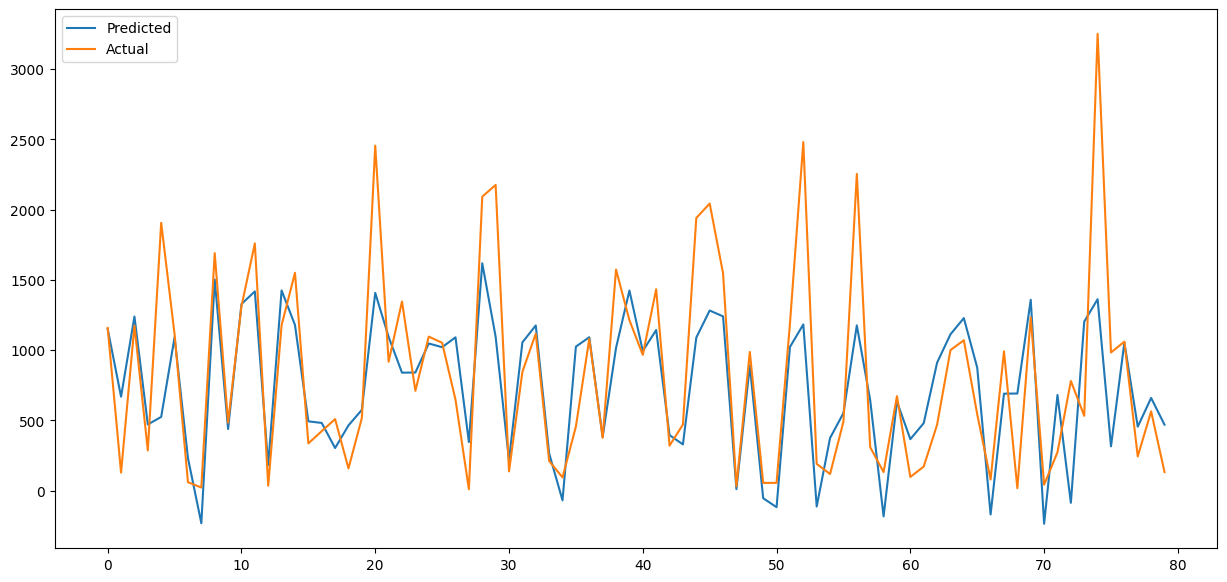

In [ ]:
score_metrix(LinearRegression(),X_train_trans,X_test_trans,Y_train,Y_test)

In [ ]:
lr_model = LinearRegression().fit(X_train,Y_train)

# ML Model 2

## 2. **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
L1=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_cv=GridSearchCV(L1,parameters,cv=5)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.244e+08, tolerance: 2.206e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.344e+08, tolerance: 2.234e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.274e+08, tolerance: 2.199e+05

Training score  = 0.5210948067018778
The best parameters found out to be :{'alpha': 1e-15} 
where model best score is:  0.518746105988362 

MAE : 341.3893445171517
MSE : 208158.01329371557
RMSE : 456.24337068467696
R2 : 0.5185645146511834
Adjusted R2 :  0.5145477704349238 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


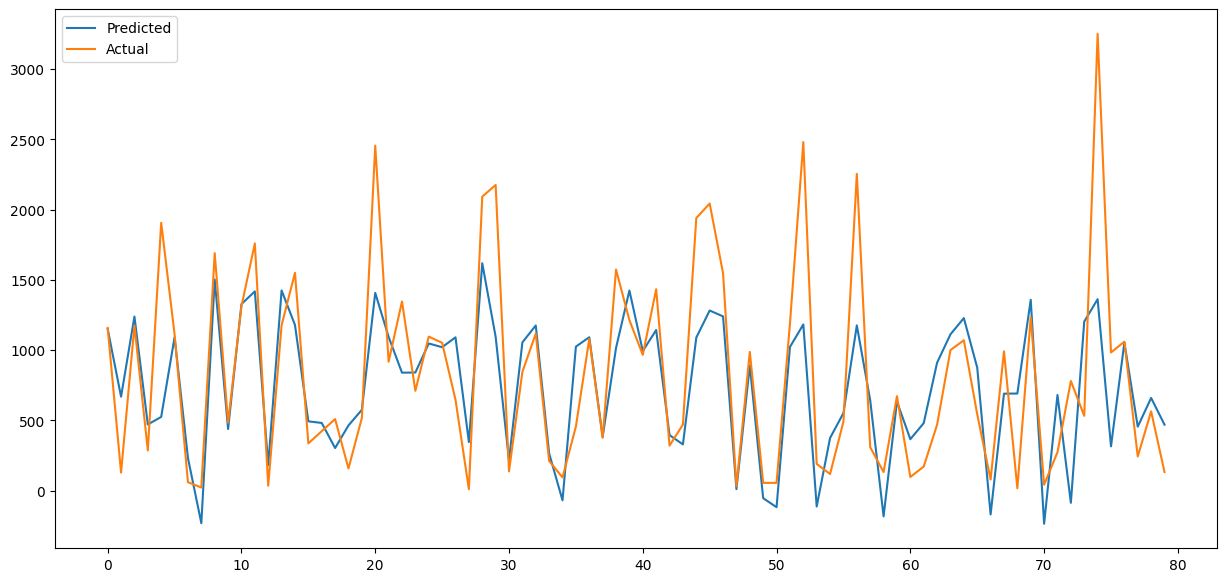

In [ ]:
score_metrix(lasso_cv,X_train_trans,X_test_trans,Y_train,Y_test)

In [ ]:
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.878e+05, tolerance: 2.760e+05
  model = cd_fast.enet_coordinate_descent(


## **ML Model 3**

#3. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.3339e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.29088e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.39203e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.30128e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill

Training score  = 0.5210948066120294
The best parameters found out to be :{'alpha': 0.01} 
where model best score is:  0.51874611024758 

MAE : 341.38913291496567
MSE : 208157.89004170202
RMSE : 456.2432356119946
R2 : 0.5185647997129594
Adjusted R2 :  0.5145480578750461 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


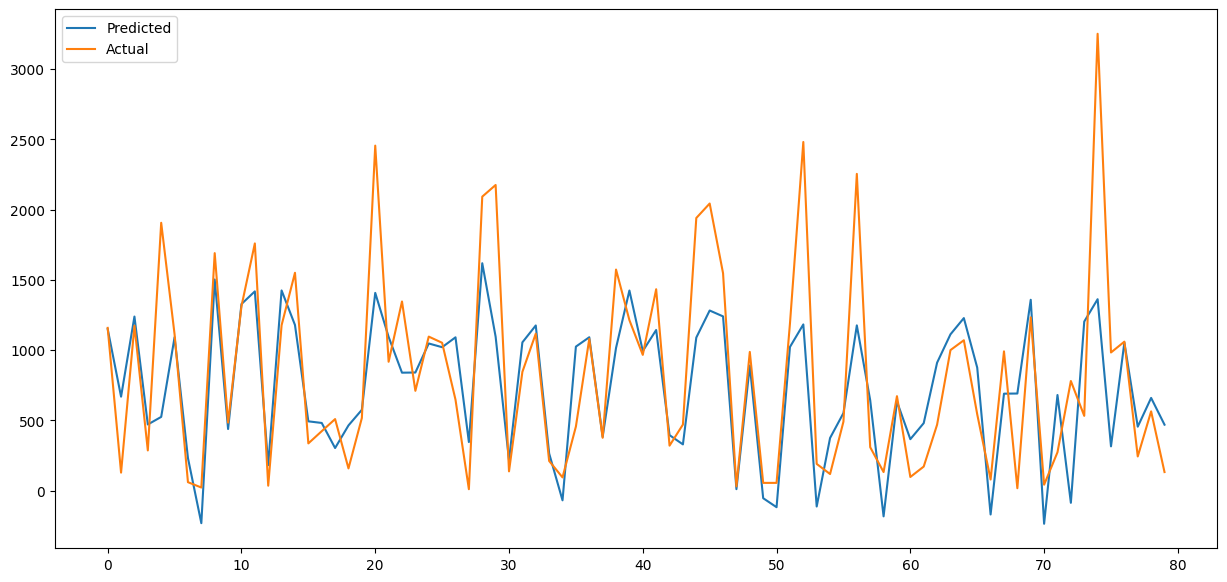

In [ ]:
L2=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_cv=GridSearchCV(L2,parameters,scoring='r2',cv=5)
score_metrix(L2_cv,X_train_trans,X_test_trans,Y_train,Y_test)

In [ ]:
ridge_model=Ridge(alpha=35).fit(X_train,Y_train)

### ML Model - 4

#4. Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(2)
poly_X_train=poly.fit_transform(X_train_trans)
poly_X_test=poly.transform(X_test_trans)

Training score  = 0.7092611625389367
MAE : 260.1246862079149
MSE : 133394.37326722164
RMSE : 365.2319444780558
R2 : 0.6914806025454849
Adjusted R2 :  0.6679295035031556 

********************************************************************************
coefficient 
 [ 3.99646759e+05  2.43556954e+02 -1.39121942e+02 -2.71718503e+02
  8.52424336e+00  1.03718149e+01  1.65219484e+02  2.69709225e+02
 -5.86477519e+13 -9.20636858e+13  5.36656418e+13  2.61483603e+14
  1.78650405e+13  6.03615611e+14  3.50451730e+13  1.05626547e+02
  3.41385205e+02 -1.56625076e+01  1.52621996e+01  1.32470177e+01
 -2.09440408e+02 -3.34678081e+00  5.79359442e+12  5.65858457e+13
 -2.83803624e+01 -3.73972287e+00  9.04139931e-01  1.92396236e+01
 -2.30127644e+01  6.87723540e+02  4.12295910e+02  3.28359616e+01
 -2.02483340e+02 -1.34435938e+03 -2.91171875e+01  6.68928637e+12
 -2.26045492e+13 -6.06640625e+01 -1.21946875e+03  2.33515625e+02
 -1.10460938e+02  7.14062500e+01 -7.76757812e+01 -5.48437500e+00
 -1.24671875e+02 -3

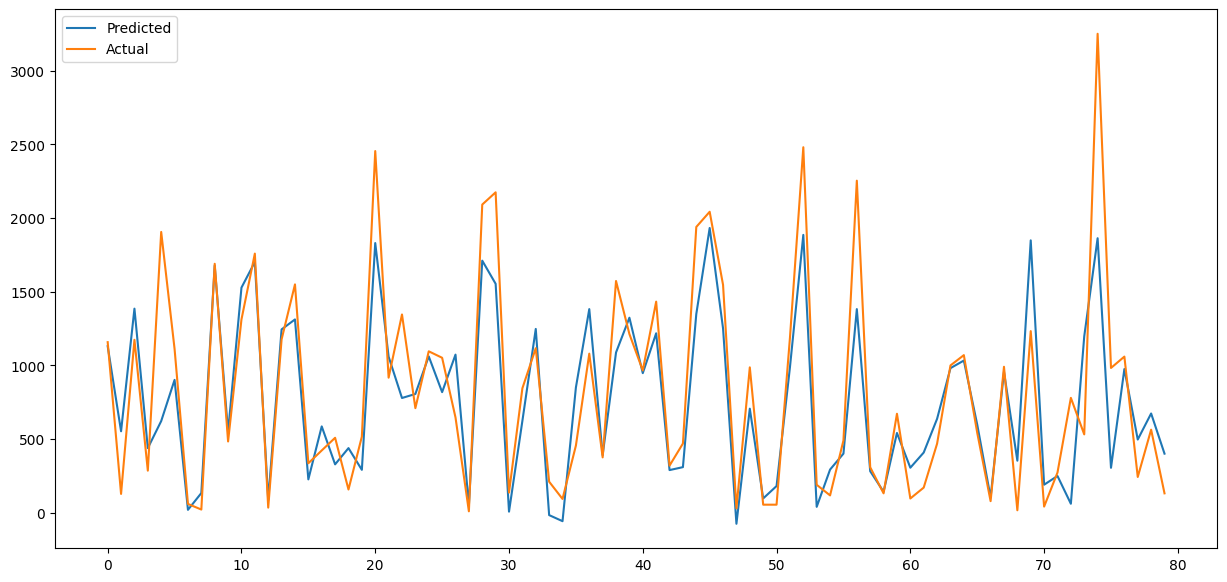

In [ ]:
score_metrix(LinearRegression(),poly_X_train,poly_X_test,Y_train,Y_test)

### ML Model - 5

# **5. Gradient Boosting Regressor**

In [ ]:
#import gradient boost regressor 
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# parameters for Gradient Boosting Regressor
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

In [ ]:
#using grid search
gradient_boost_grid_search=GridSearchCV(GradientBoostingRegressor(),param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training score  = 0.954439720968623
The best parameters found out to be :{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 250} 
where model best score is:  0.8808314007217627 

MAE : 133.6726437796797
MSE : 48774.1989663312
RMSE : 220.8488147270236
R2 : 0.8871932443036804
Adjusted R2 :  0.8862520675577039 



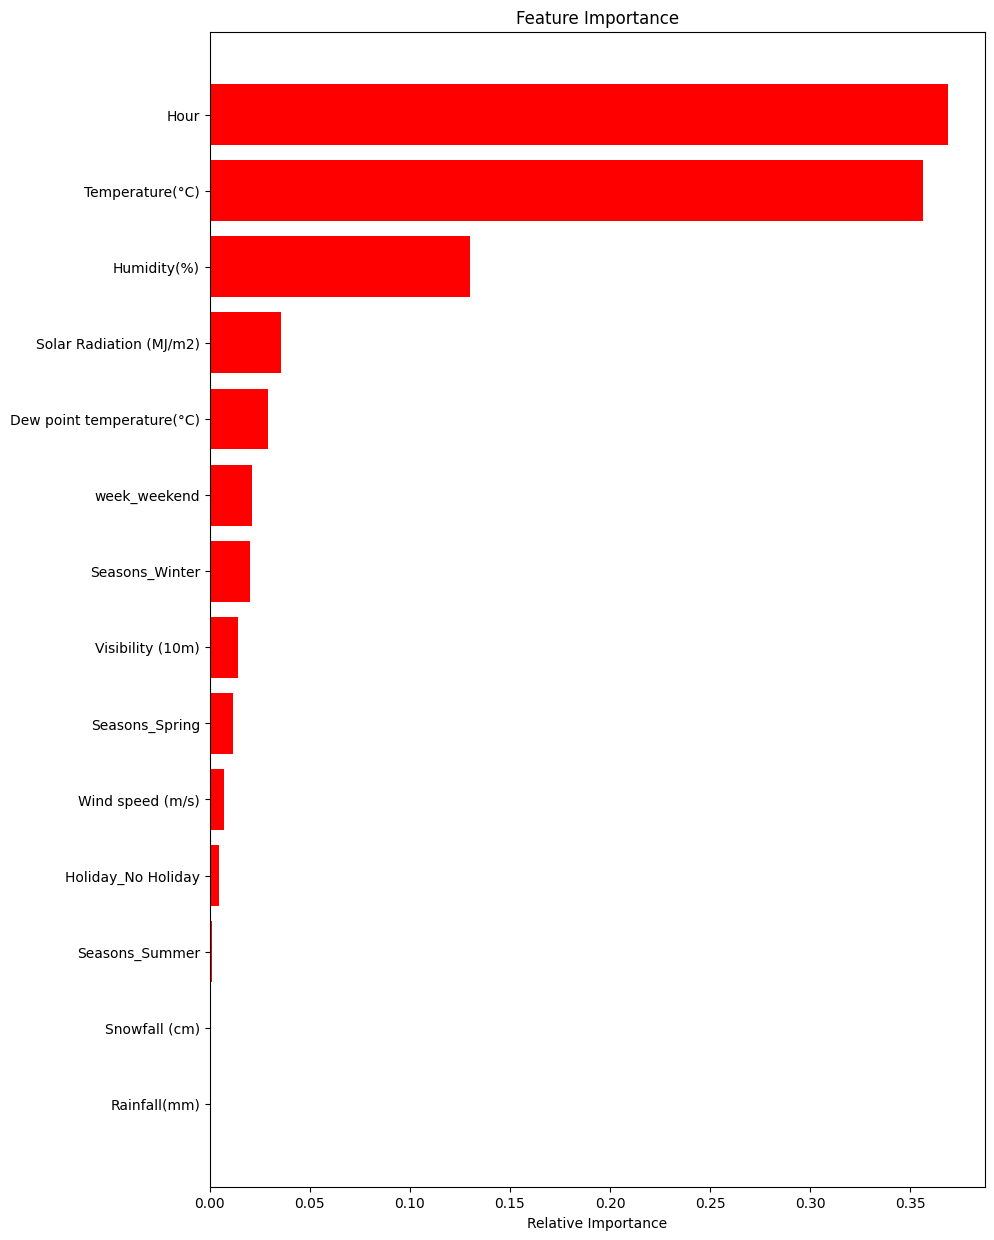

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


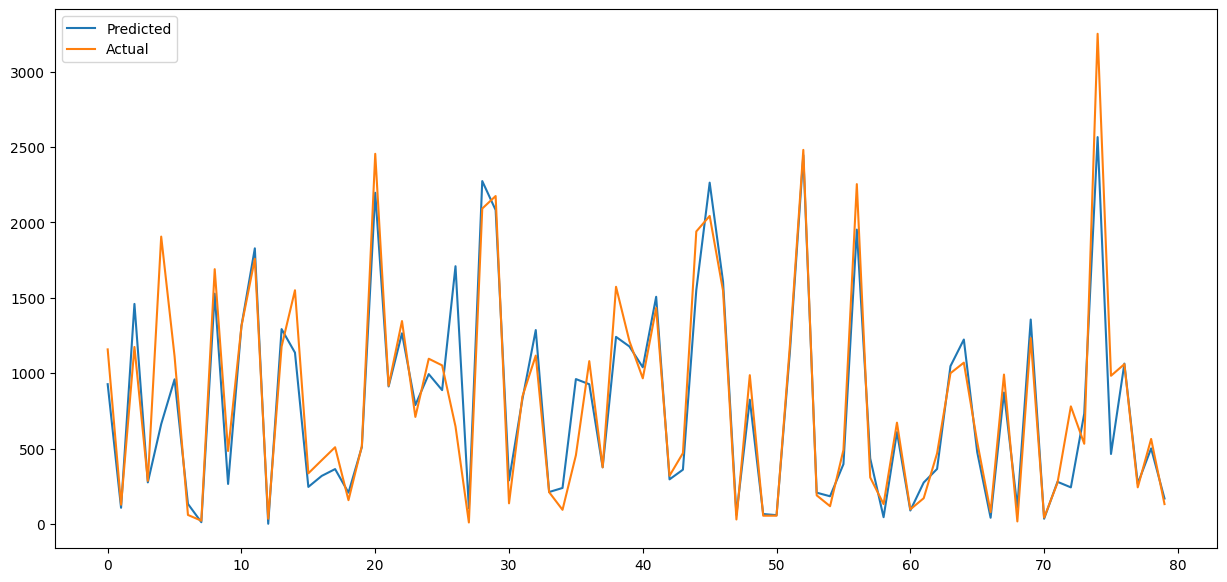

In [ ]:
score_metrix(gradient_boost_grid_search,X_train,X_test,Y_train,Y_test)

## ML Model 6

#6. Adaboost Boost Regressor

In [ ]:
#import ada boost Regressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#parameters for ada boost
from sklearn.tree import DecisionTreeRegressor
param_grid={'n_estimators':[50,100,150,200],
            'learning_rate':[0.5,1,1.5,2],
            'base_estimator':[LinearRegression(),DecisionTreeRegressor()]}

In [ ]:
Ada_boost_grid_search=GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training score  = 0.9993940082855473
The best parameters found out to be :{'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1, 'n_estimators': 150} 
where model best score is:  0.8634007667395771 

MAE : 131.72888363851152
MSE : 52531.178381571175
RMSE : 229.1968114559432
R2 : 0.8785039645608468
Adjusted R2 :  0.8774902908444295 



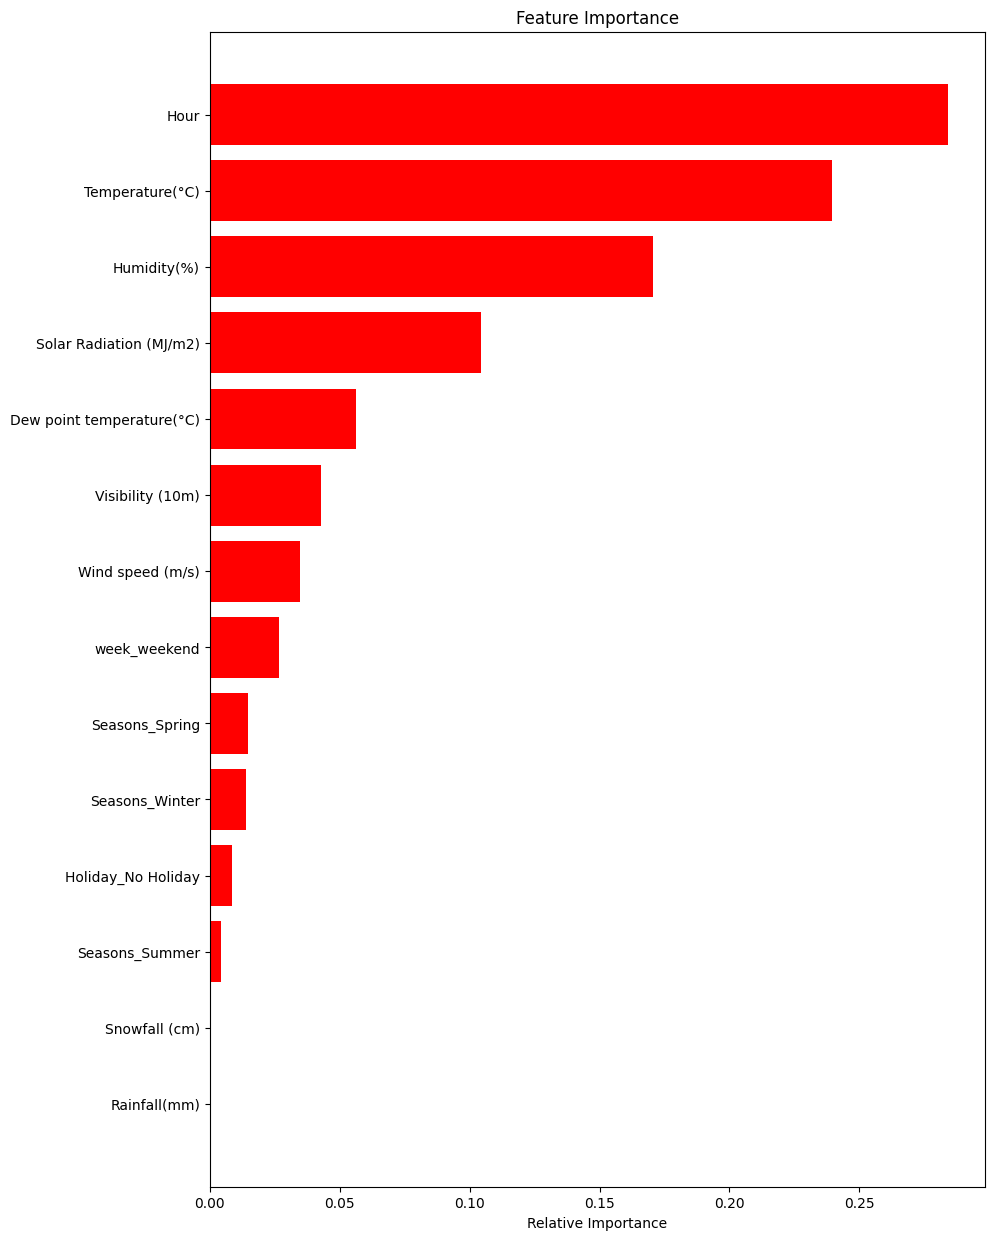

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


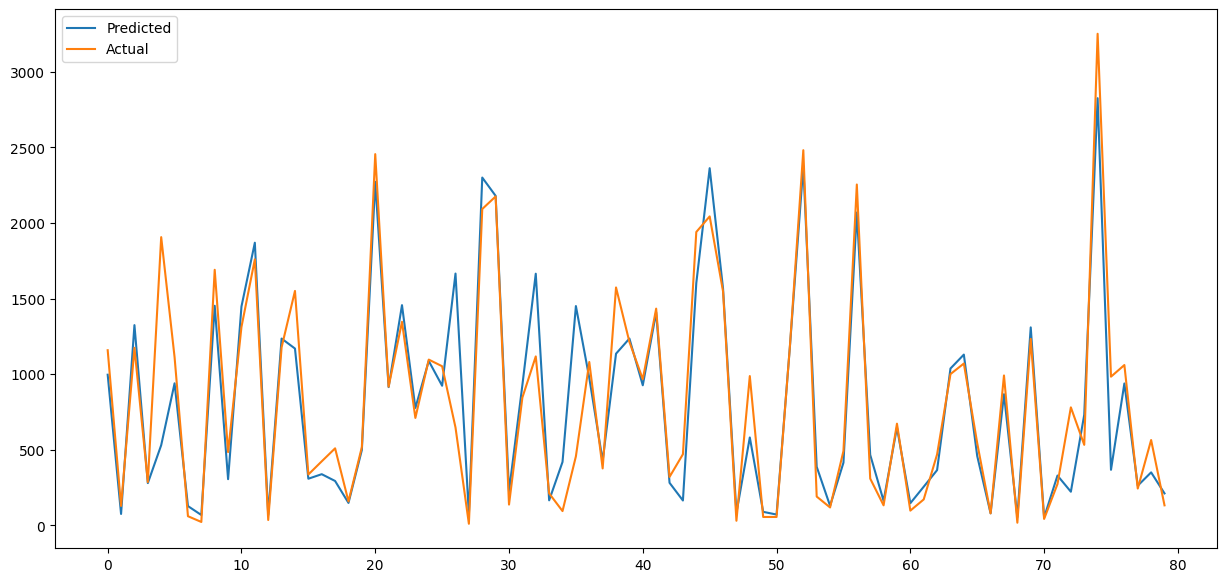

In [ ]:
score_metrix(Ada_boost_grid_search,X_train,X_test,Y_train,Y_test)

### ML Model 7

## **7. XGBoost Regression**

In [ ]:
# import xgboost Regressor
from xgboost import XGBRegressor

In [ ]:
# parameters
params={'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

In [ ]:
xgb_grid_search=GridSearchCV(XGBRegressor(),param_grid=params)

Training score  = 0.999999999995945
The best parameters found out to be :{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 150} 
where model best score is:  0.8467153441679061 

MAE : 148.70326864515192
MSE : 63840.00742657895
RMSE : 252.66580185410717
R2 : 0.8523484901024706
Adjusted R2 :  0.8511165943107153 



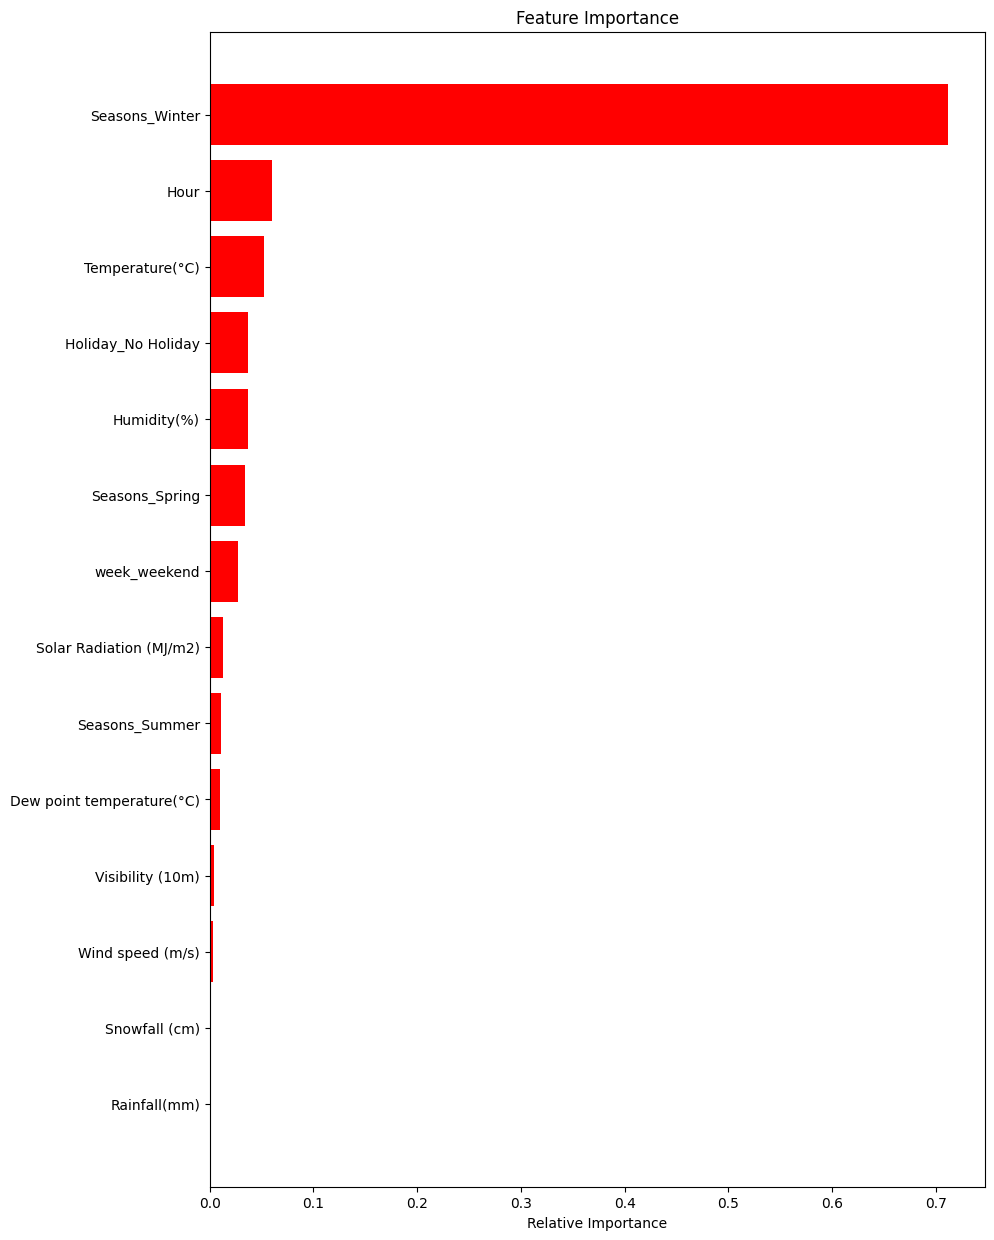

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


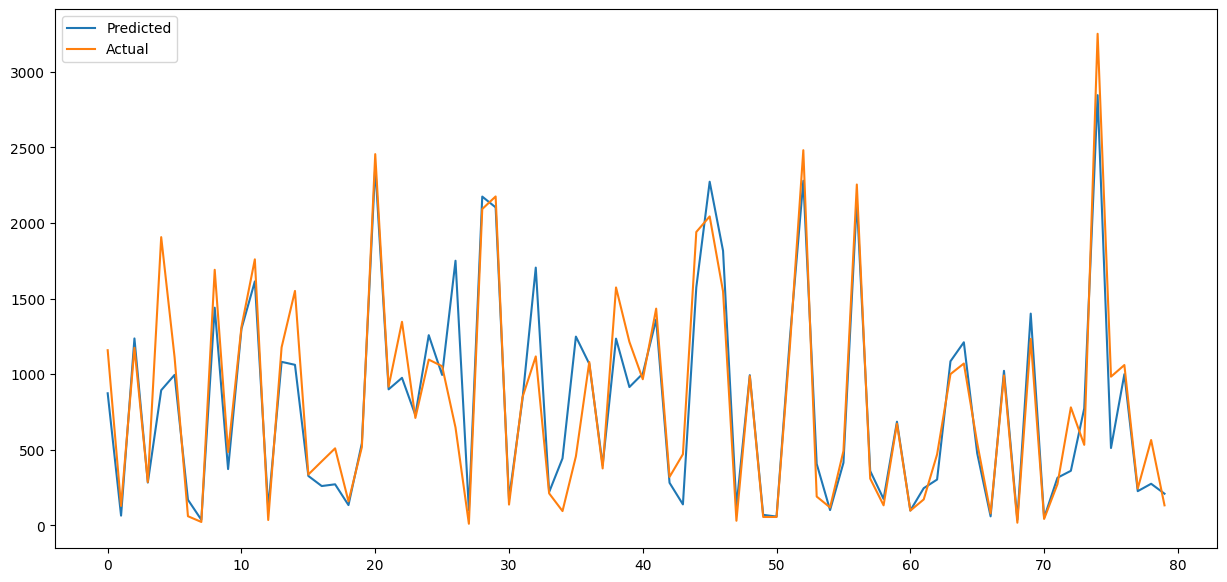

In [ ]:
score_metrix(xgb_grid_search,X_train,X_test,Y_train,Y_test)

# **DataFrame of all Models and their Scores.**

In [ ]:
#dictonary to store all metrics
metrics={'mean_absolute_error':mean_absolut_error,'Mean_Squared_Error':mean_sq_error,'Root_mean_squared_error':root_mean_sq_error,'Training_score':training_score,'r2_score':r2_list,'adj sore':adj_r2_list}

In [ ]:
models=['Linear','Lasso','Ridge','Polynomial','gradient_boosting','ada_boost','XG_boost',]

In [ ]:
metrics_df=pd.DataFrame.from_dict(metrics,orient='index',columns=models)
metrics_df

Linear          Lasso          Ridge  \
mean_absolute_error         341.389345     341.389345     341.389133   
Mean_Squared_Error       208158.013610  208158.013294  208157.890042   
Root_mean_squared_error     456.243371     456.243371     456.243236   
Training_score                0.521095       0.521095       0.521095   
r2_score                      0.518565       0.518565       0.518565   
adj sore                      0.514548       0.514548       0.514548   

                            Polynomial  gradient_boosting     ada_boost  \
mean_absolute_error         260.124686         133.672644    131.728884   
Mean_Squared_Error       133394.373267       48774.198966  52531.178382   
Root_mean_squared_error     365.231944         220.848815    229.196811   
Training_score                0.709261           0.954440      0.999394   
r2_score                      0.691481           0.887193      0.878504   
adj sore                      0.667930           0.886252      0.877490   

                             XG_boost  
mean_absolute_error        148.703269  
Mean_Squared_Error       63840.007427  
Root_mean_squared_error    252.665802  
Training_score               1.000000  
r2_score                     0.852348  
adj sore                     0.851117

## **Model Explainability:**

In [ ]:
#Install shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 11.2 MB/s eta 0:00:00


In [ ]:
#import shap
import shap

In [ ]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


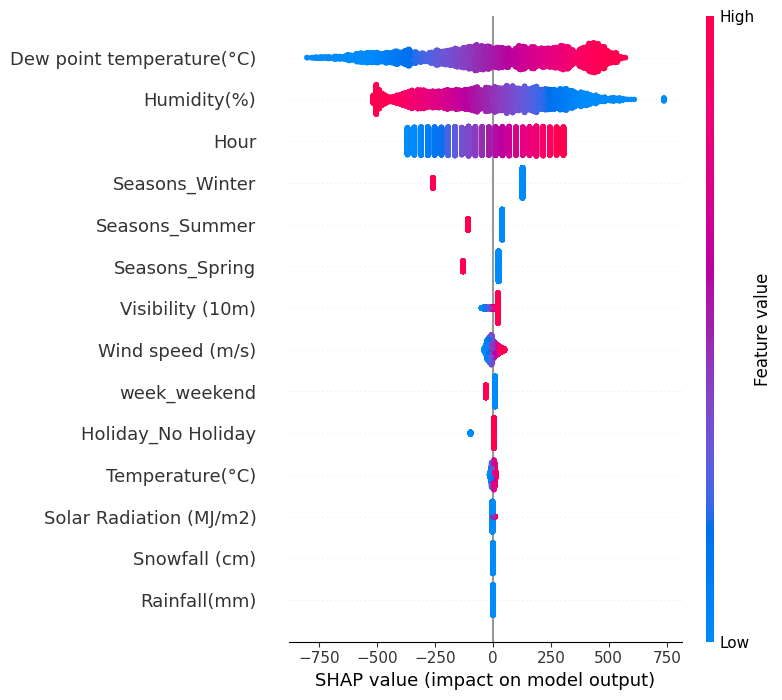

In [ ]:
#shap for linear model
shap_summary(lr_model)

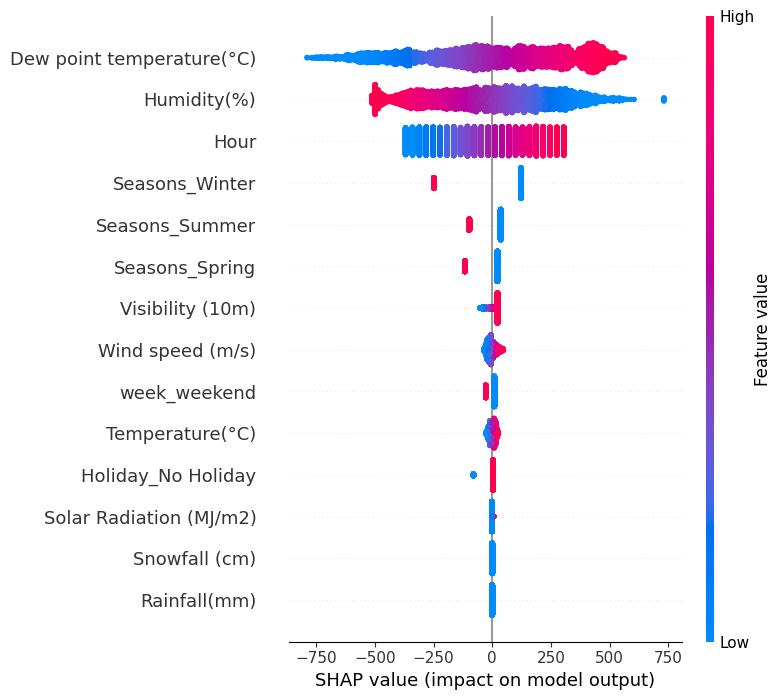

In [ ]:
# for lasso model
shap_summary(lasso_model)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*   As no Functioning Day has 0 Rented Bike count so we removed no Functining day count and after that all are functioning days so there is no use of functioning days so ve droped the column
*   Instade of doing HotIncoding we used LabelIncoding because it is easy and time saving task compaired to Creating Dummis.


*   To avoid Multicollinearity with Temperature we dropped Dew point Temperature 
*   During Holiday the demand of bike is decrease as well as during weekend demand of bike is very less.


*   In winter as compaired to other seasons the Rented Bike count is significantly low

**conclusions based on model**


*   Gradient_boosting is the most sutable model as its R2-score is 90.9495% and 90.8849% adjusted-R2 score
*   Here LinearRegression and PolynomialRegression not performed well as there is no linear relationship between dependent and independent variabels. 










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***